In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

# Crear el objeto RFECV
rfecv = RFECV(
    estimator=forest,  # Usa el mismo RandomForest para coherencia
    step=1,
    cv=StratifiedKFold(5),
    scoring='accuracy',
    min_features_to_select=1
)

# Ajustar RFECV
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

# Transformar los conjuntos de datos para quedarse solo con las características seleccionadas
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)


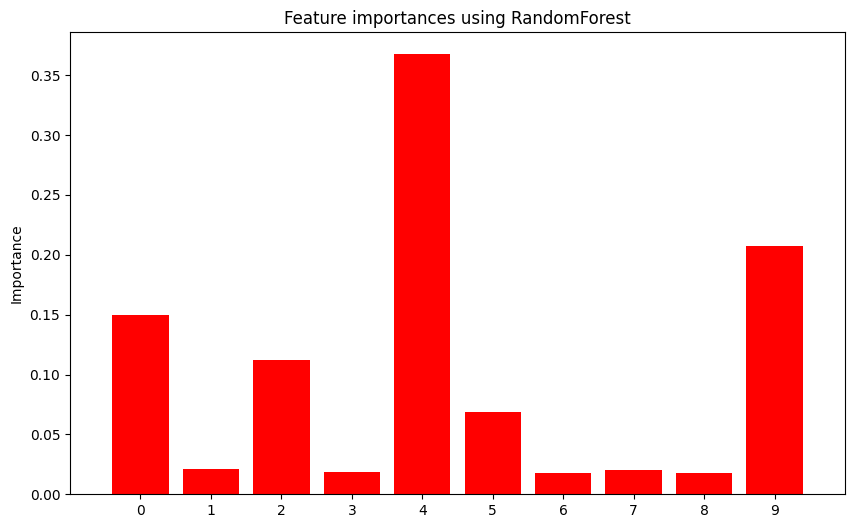

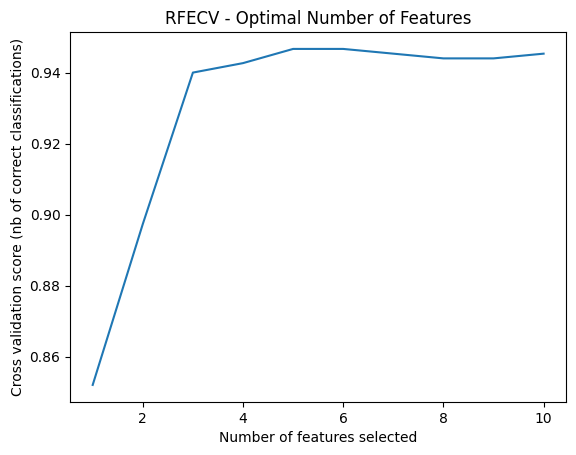

In [5]:
# Gráfico de importancias de características
plt.figure(figsize=(10, 6))
plt.title("Feature importances using RandomForest")
plt.bar(range(X_train.shape[1]), importances, color="r", align="center")
plt.xticks(range(X_train.shape[1]), range(X_train.shape[1]))
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("Importance")
plt.show()

# Gráfico de número de características vs. CV scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")

# Ajustar para el uso de 'cv_results_'
# 'mean_test_score' contiene los scores medios de las pruebas en la validación cruzada
mean_score = rfecv.cv_results_['mean_test_score']

plt.plot(
    range(1, len(mean_score) + 1),
    mean_score
)
plt.title("RFECV - Optimal Number of Features")
plt.show()
